This example shows how RGroupDecomposition works with stereochemistry matching.
If stereochemistry is specified in the core, the RGroup decomposition correctly assigns R1 and R2.

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
from rdkit.Chem import rdRGroupDecomposition
from IPython.display import HTML
from rdkit import rdBase
rdBase.DisableLog("rdApp.debug")

In [2]:
import pandas as pd
from rdkit.Chem import PandasTools

In [3]:
m = Chem.MolFromSmarts("C1CCO[C@@](*)(*)1")

Perhaps we should file a bug that smarts doesn't show stereochem here.

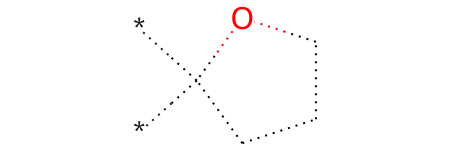

In [4]:
m

Make some example stereochemistries

In [5]:
el = "NOPS"
mols = []
for e in el:
    smi = "C1CCO[C@@H](%s)1"%e
    print(smi)
    m = Chem.MolFromSmiles(smi)
    mols.append(m)
    smi = "C1CCO[C@H](%s)1"%e
    print(smi)
    m = Chem.MolFromSmiles(smi)
    mols.append(m)
    for e2 in el:
        if e != e2:
            smi = "C1CCO[C@@](%s)(%s)1"%(e,e2)
            m = Chem.MolFromSmiles(smi)
            if m:
                print(smi)
                mols.append(m)

C1CCO[C@@H](N)1
C1CCO[C@H](N)1
C1CCO[C@@](N)(O)1
C1CCO[C@@](N)(P)1
C1CCO[C@@](N)(S)1
C1CCO[C@@H](O)1
C1CCO[C@H](O)1
C1CCO[C@@](O)(N)1
C1CCO[C@@](O)(P)1
C1CCO[C@@](O)(S)1
C1CCO[C@@H](P)1
C1CCO[C@H](P)1
C1CCO[C@@](P)(N)1
C1CCO[C@@](P)(O)1
C1CCO[C@@](P)(S)1
C1CCO[C@@H](S)1
C1CCO[C@H](S)1
C1CCO[C@@](S)(N)1
C1CCO[C@@](S)(O)1
C1CCO[C@@](S)(P)1


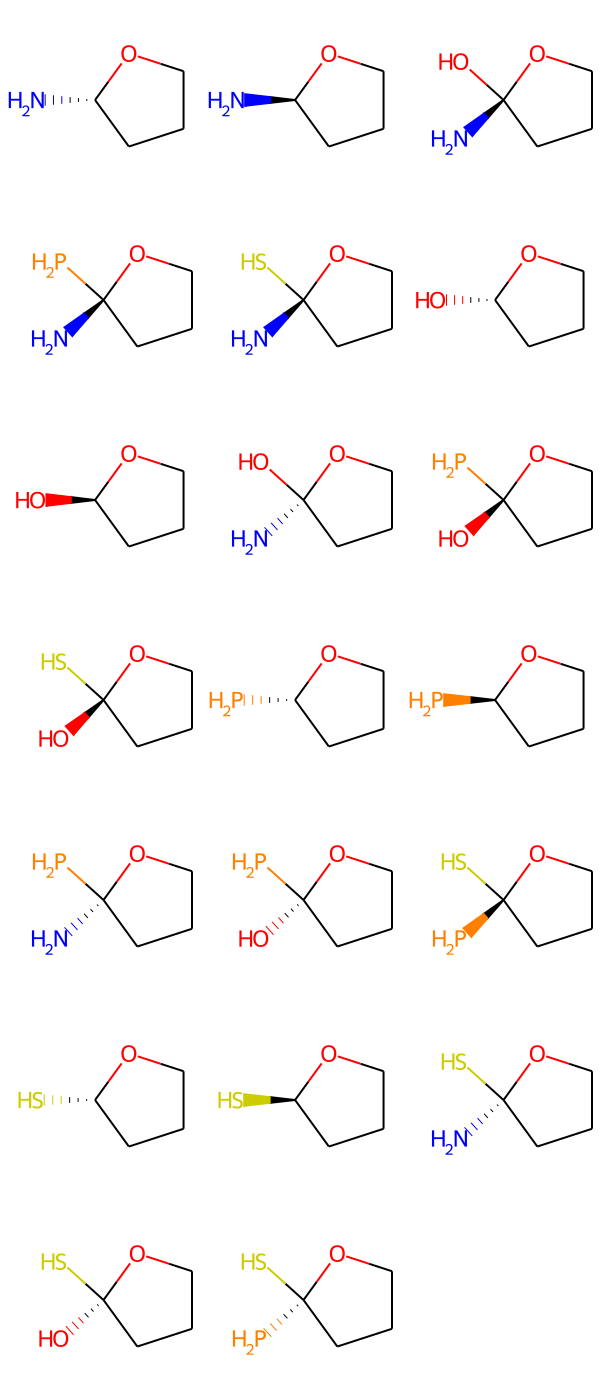

In [6]:
from rdkit.Chem import Draw
Draw.MolsToGridImage(mols)

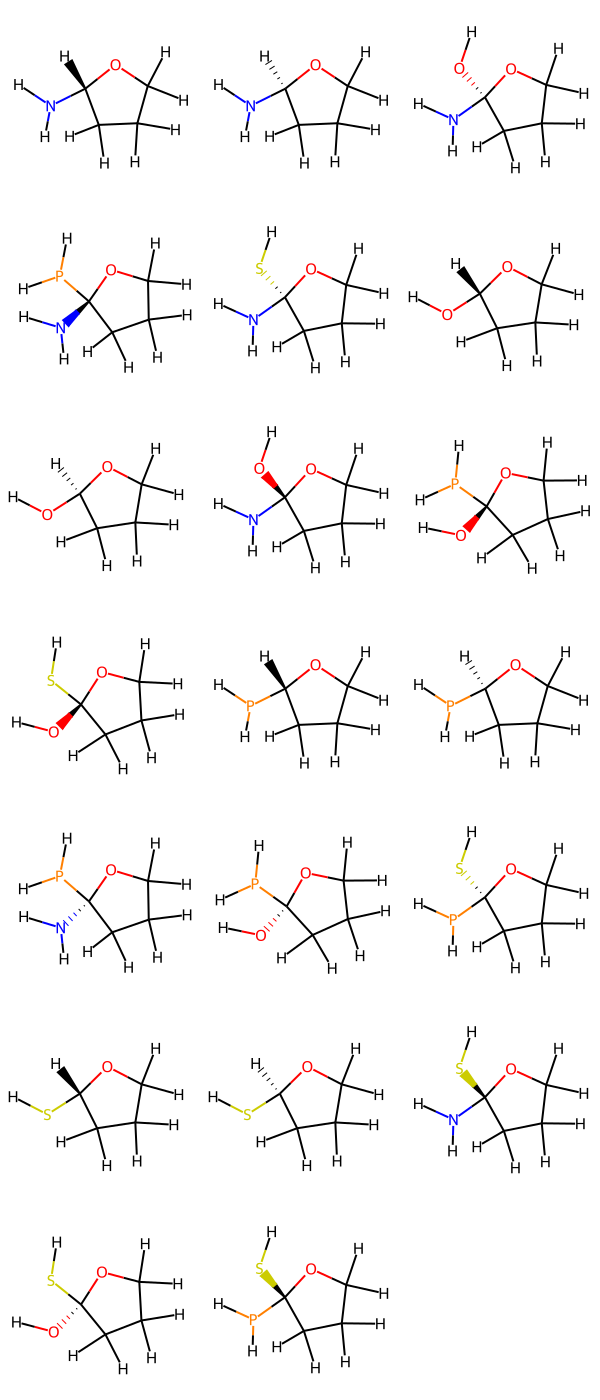

In [7]:
hmols = [Chem.AddHs(m) for m in mols]
Draw.MolsToGridImage(hmols)

In [8]:
core = Chem.MolFromSmarts("C1CCO[C@@](*)(*)1")

Make RGroup decomposition!

To use RGroupDecomposition:
  
  1. construct the class on the core rg = RGroupDecomposition(core)
  2. Call rg.Add( mol ) on the molecules.  If this returns -1, the molecule is not
     compatible with the core
  3. After all molecules are added, call rg.Process() to complete the rgroup
     decomposition.

In [9]:
rgroups = rdRGroupDecomposition.RGroupDecomposition(core)

In [10]:
for i,m in enumerate(mols):
    rgroups.Add(m)
    if i == 10:
        break

We need to call process after all molecules are added.  To optimize the RGroups.

In [11]:
rgroups.Process()

True

The RGroupDecomposition code is quite compatible with the python pandas integration.
Calling rg.GetRGroupsAsColumns() can be sent directly into a pandas table.

**n.b.** You need to call PandasTools.ChangeMoleculeRendering(frame) to allow the molecules
to be rendered properly.

In [12]:
groups = rgroups.GetRGroupsAsColumns()
frame = pd.DataFrame(groups)
PandasTools.ChangeMoleculeRendering(frame)

The first two (0 and 1) are different due to the sterochemistry difference.
I still haven't found a way to show the core with stereochem which is annoying.

,Core,R1,R2
0,,,
1,,,
2,,,
3,,,
4,,,
5,,,
6,,,
7,,,
8,,,
9,,,

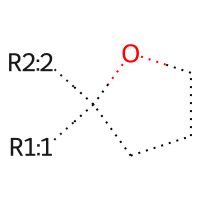
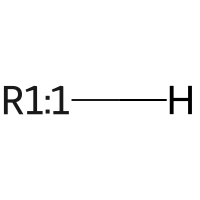
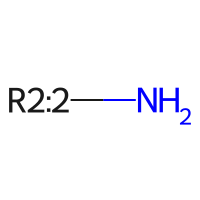
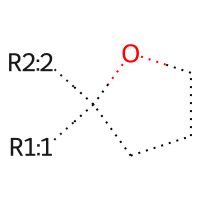
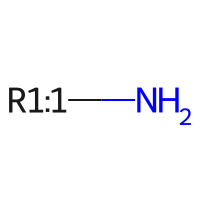
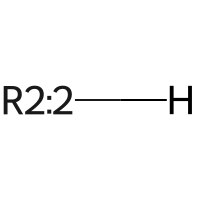
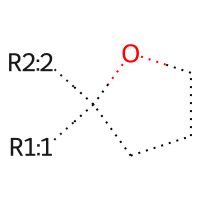
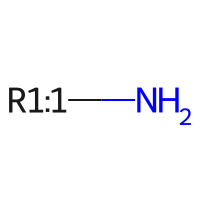
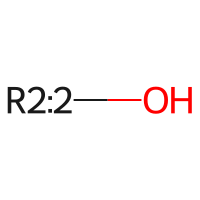
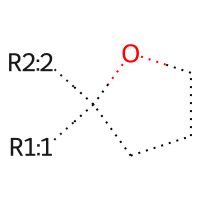
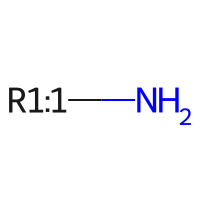
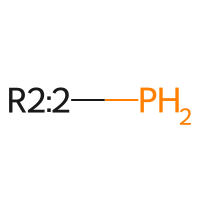
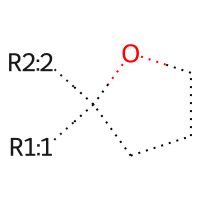
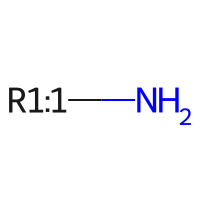
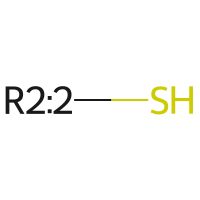
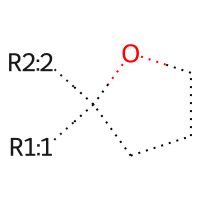
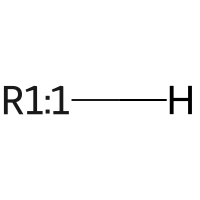
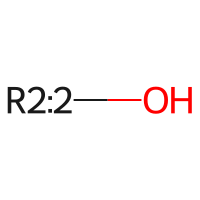
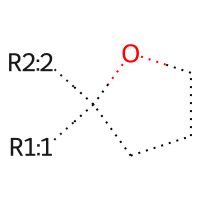
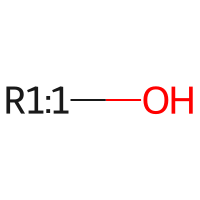
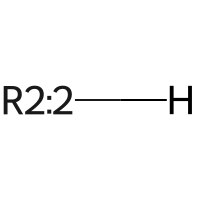
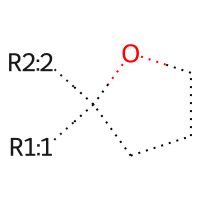
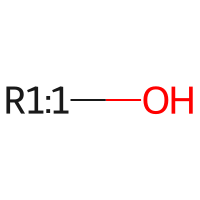
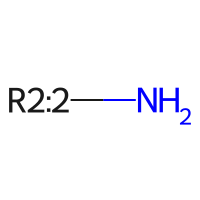
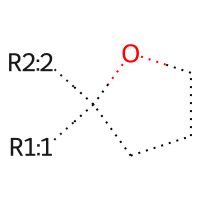
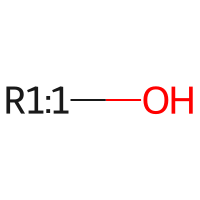
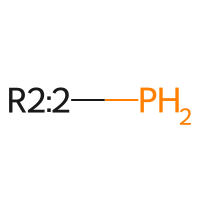
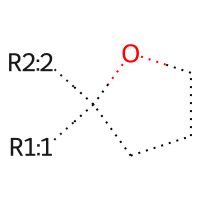
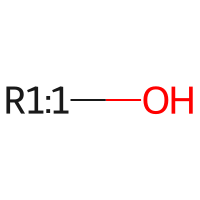
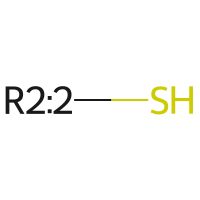
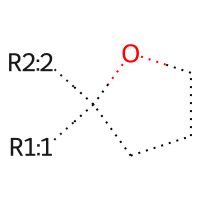
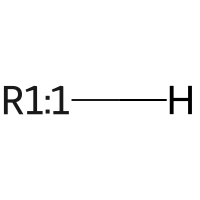
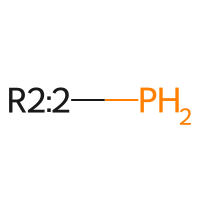

In [13]:
HTML(frame.to_html())

Let's try the same with stereochemistry in the core.

**Note that the core has symmetry and the analysis nicely supports this during 
the side chain optimization**

**n.b.** stereo information is lost here which is fairly annoying and will be analyzed at a later date.

,Core,R1
0,,
1,,
2,,
3,,
4,,
5,,
6,,
7,,
8,,
9,,

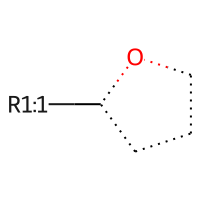
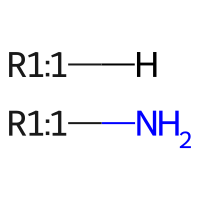
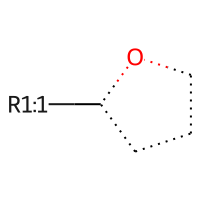
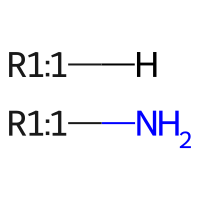
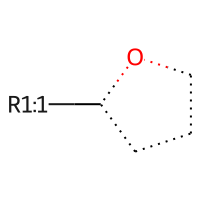
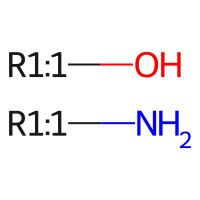
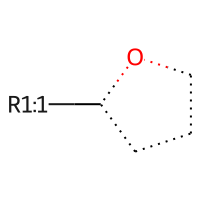
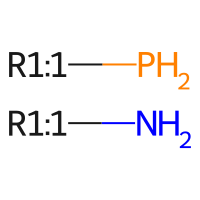
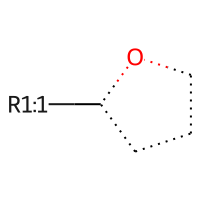
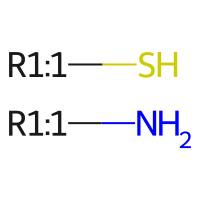
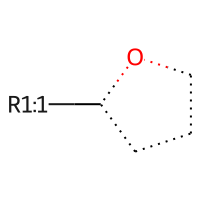
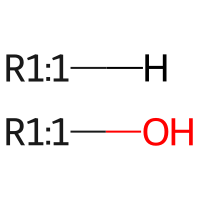
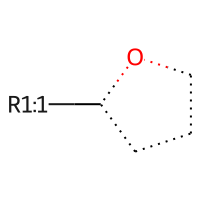
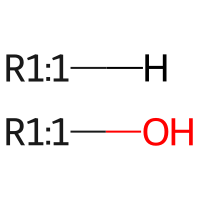
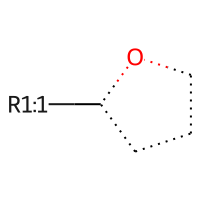
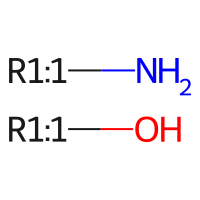
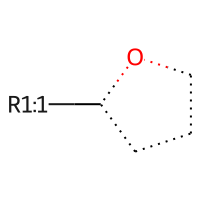
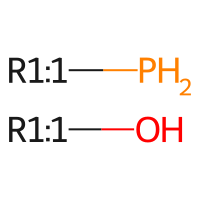
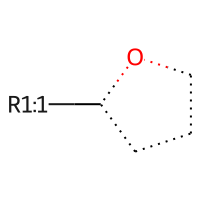
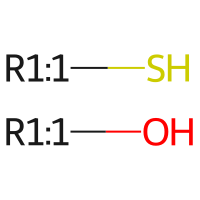
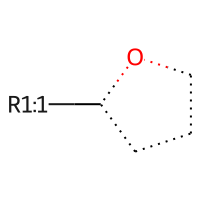
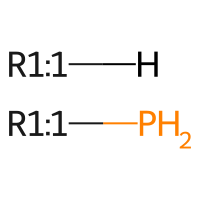
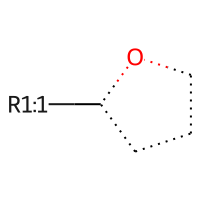
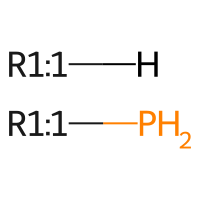
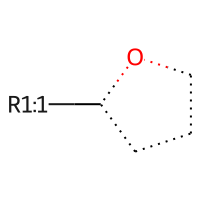
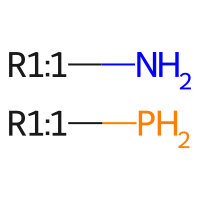
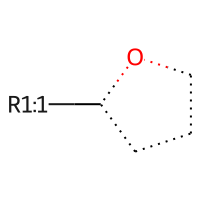
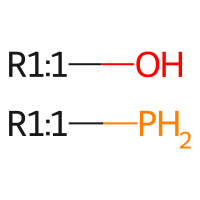
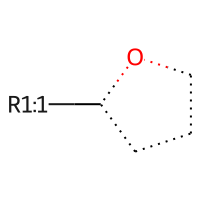
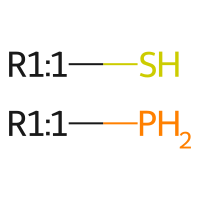
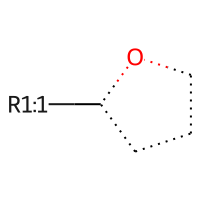
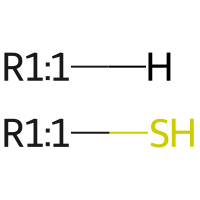
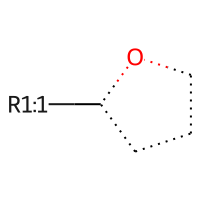
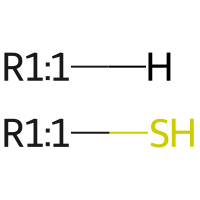
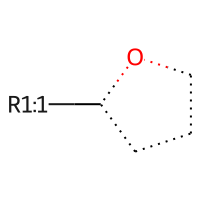
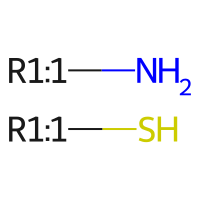
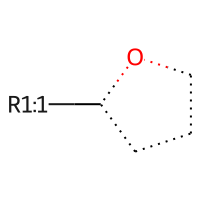
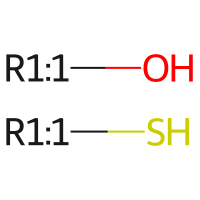
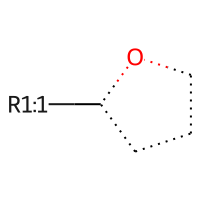
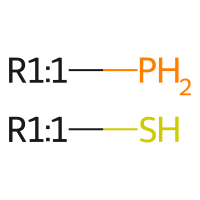

In [14]:
core = Chem.MolFromSmarts("C1CCOC1")
rgroups = rdRGroupDecomposition.RGroupDecomposition(core)
for m in mols:
    rgroups.Add(m)
rgroups.Process()
frame = pd.DataFrame(rgroups.GetRGroupsAsColumns())
PandasTools.ChangeMoleculeRendering(frame)
HTML(frame.to_html())